csvからデータ分析

In [37]:
import pandas as pd
import matplotlib.pyplot as plt         
import os
import mplcursors
from PIL import Image
from IPython.display import display
import datetime
import sys

In [25]:

def plot_colored_scatter_with_annotation(df, x_column, y_column, color_column, title,  column_1, column_2, save_folder, text_size=5,):
    # カラーマップを作成
    colormap = plt.cm.get_cmap('viridis')  # 任意のカラーマップを選択

    # 文字列を数値に変換してカラーインデックスを取得
    color_index = pd.Categorical(df[color_column]).codes
    # print(color_index)
    # print(df[color_column])

    # グラフを散布図としてプロット
    scatter = plt.scatter(df[x_column], df[y_column], c=color_index, cmap=colormap, marker='o', label='Data Points')

    # plt.axhline(y=100, color='r', linestyle='--', label='y=100')
    # plt.text(1, 100, 'y=100', color='r', fontsize=12, verticalalignment='bottom')

    # x軸、y軸のラベルを設定
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    # グラフにタイトルを追加
    plt.title(title)

    # 凡例を表示
    # plt.legend()

    # カラーバーを表示
    plt.colorbar(scatter, label=color_column)

    # 各点の周りにテキストを表示する関数
    def annotate_point(index, row):
        # plt.annotate(f"{row[column_1]}\n{row[column_2]}",
        #              (row[x_column], row[y_column]),
        #              textcoords="offset points",
        #              xytext=(5, 5),
        #              ha='center',
        #              fontsize=text_size)
        plt.annotate(f"{row[column_1]}",
                    (row[x_column], row[y_column]),
                    textcoords="offset points",
                    xytext=(5, 5),
                    ha='center',
                    fontsize=text_size)

    # 各行に対してannotate_point関数を適用
    df = df.iloc[::-1]
    i=0
    pre_row = df.iloc[0]
    for index, row in df.iterrows():
        if pre_row['path']!=row['path'] or i==0:
            i=1
            annotate_point(index, row)
        pre_row = row

    # グラフを表示
    plt.show()
    png_name = y_column + ":" + title + ".png"
    png_path = save_folder + "/"+ png_name
    print(png_path)
    # plt.savefig(png_path)
    plt.clf()

In [63]:
#def plot_colored_scatter_with_annotation にindexを追加 profit-ratioのみ
def with_index_plot_colored_scatter_with_annotation(df, x_column, y_column, color_column, title,  column_1, column_2, save_folder, text_size=5,):
    # カラーマップを作成
    colormap = plt.cm.get_cmap('viridis')  # 任意のカラーマップを選択

    # 文字列を数値に変換してカラーインデックスを取得
    color_index = pd.Categorical(df[color_column]).codes
    # print(color_index)
    # print(df[color_column])

    # グラフを散布図としてプロット
    scatter = plt.scatter(df[x_column], df[y_column], c=color_index, cmap=colormap, marker='o', label='Data Points')

    start_date = title.split(":")[0]
    end_date = title.split(":")[1]
    # print(start_date)
    index_value = get_index(start_date, end_date) #20銘柄の変化率の平均
    # return 1
    plt.axhline(y=index_value, color='r', linestyle='--', label='index')
    plt.text(1, index_value, 'index', color='r', fontsize=text_size, verticalalignment='bottom')

    # x軸、y軸のラベルを設定
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    # グラフにタイトルを追加
    plt.title(title)

    # 凡例を表示
    # plt.legend()

    # カラーバーを表示
    plt.colorbar(scatter, label=color_column)

    # 各点の周りにテキストを表示する関数
    def annotate_point(index, row):
        # plt.annotate(f"{row[column_1]}\n{row[column_2]}",
        #              (row[x_column], row[y_column]),
        #              textcoords="offset points",
        #              xytext=(5, 5),
        #              ha='center',
        #              fontsize=text_size)
        plt.annotate(f"{row[column_1]}",
                    (row[x_column], row[y_column]),
                    textcoords="offset points",
                    xytext=(5, 5),
                    ha='center',
                    fontsize=text_size)

    # 各行に対してannotate_point関数を適用
    df = df.iloc[::-1]
    i=0
    pre_row = df.iloc[0]
    for index, row in df.iterrows():
        if pre_row['path']!=row['path'] or i==0:
            i=1
            annotate_point(index, row)
        pre_row = row

    # グラフを表示
    plt.show()
    png_name = y_column + ":" + title + ".png"
    png_path = save_folder + "/"+ png_name
    print(png_path)
    # plt.savefig(png_path)
    plt.clf()
    
def get_index(start_date, end_date):
    stocks = ['INTC', 'GD', 'PPL', 'CSCO', 'V', 'PEP', 'GE', 'MA', 'AMZN', 'AEP', 'XOM', 'AMGN', 'BA', 'DHR', 'UPS', 'KO', 'UNH', 'MCD', 'PFE', 'CHTR']
    price_folder = "/home/fukuda/stocknet-dataset/price/raw/"
    dates = pd.date_range(start=start_date, end=end_date)
    # dfを作成
    index_df = pd.DataFrame({
        "Date": dates,
        "close": [0 for _ in range(len(dates))],
        "adj_close": [0 for _ in range(len(dates))]
    })
    # dfを表示
    index_df = index_df.set_index("Date")
    start_datetime = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end_datetime = datetime.datetime.strptime(end_date, "%Y-%m-%d")

    for stock in stocks:
        csv_path = price_folder + stock + ".csv"
        stock_df = pd.read_csv(csv_path)
        # print(stock_df)
        for index, row in stock_df.iterrows():
            date = datetime.datetime.strptime(row["Date"], "%Y-%m-%d")
            if date >= start_datetime and date <= end_datetime:
                index_df.loc[date, "close"] += row["Close"]
                index_df.loc[date, "adj_close"] += row["Adj Close"]
            
    # print(index_df)
    # print(index_df.iloc[0, -1], index_df.iloc[-1, -1])
    value = index_df.iloc[-1, -1]/index_df.iloc[0, -1]
    # print(value)
    return value

/tmp/ipykernel_40615/3588251163.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')  # 任意のカラーマップを選択


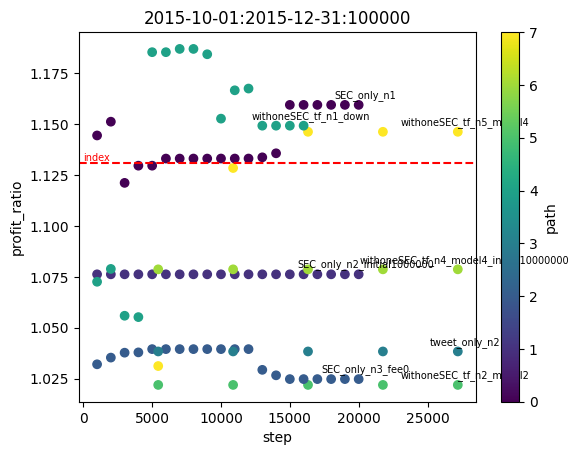

/home/fukuda/nohup_test_pngs/profit_ratio:2015-10-01:2015-12-31:100000.png


<Figure size 640x480 with 0 Axes>

In [64]:
with_index_plot_colored_scatter_with_annotation(filter_df, 'step', 'profit_ratio', 'path', title, 'basename', 'INPUT_TEXT', save_folder, 7)


In [27]:
csv_path = "/home/fukuda/kc_profit_naacl/all_nohup_test_0124.csv"
df = pd.read_csv(csv_path)

In [ ]:

# 'path'列のベースネームを取得して新しい列 'basename' を追加
df['basename'] = df['path'].apply(lambda x: os.path.basename(x).split(':')[0])
# 結果を表示
# print(df)


In [29]:
# filter_columns = {'start_date':"2015-12-01", 'end_date':"2015-12-31", 'previous_total_asset':1000000}
# filter_columns = {'start_date':"2015-11-01", 'end_date':"2015-11-30", 'previous_total_asset':1000000}
# filter_columns = {'start_date':"2015-10-01", 'end_date':"2015-10-30", 'previous_total_asset':1000000}
filter_columns = {'start_date':"2015-10-01", 'end_date':"2015-12-31", 'previous_total_asset':100000}

filter_df = df[(df['start_date'] == filter_columns['start_date']) & (df['end_date'] == filter_columns['end_date'])
               & (df['previous_total_asset'] == filter_columns['previous_total_asset'])]


In [ ]:
print(filter_df.iloc[:, 10:20])

/tmp/ipykernel_40615/3609241488.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')  # 任意のカラーマップを選択


ValueError: Image size of 579x201479 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 2 Axes>

/home/fukuda/nohup_test_pngs/profit_ratio:2015-10-01:2015-12-31:100000.png


/tmp/ipykernel_40615/1534964306.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')  # 任意のカラーマップを選択


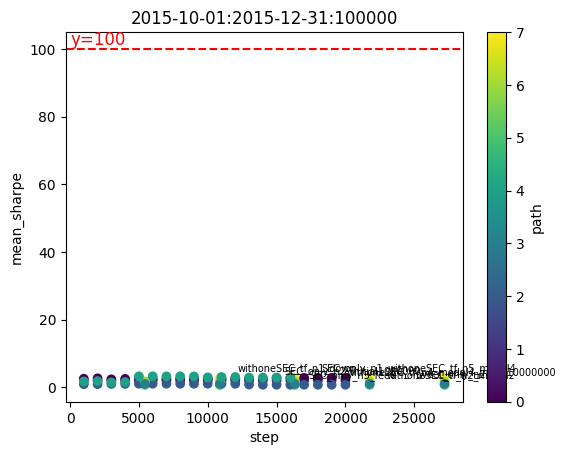

/home/fukuda/nohup_test_pngs/mean_sharpe:2015-10-01:2015-12-31:100000.png


<Figure size 640x480 with 0 Axes>

In [54]:
all_values = filter_columns.values()
title= ':'.join(map(str, all_values))
save_folder = "/home/fukuda/nohup_test_pngs"
with_index_plot_colored_scatter_with_annotation(filter_df, 'step', 'profit_ratio', 'path', title, 'basename', 'INPUT_TEXT', save_folder, 7)
plot_colored_scatter_with_annotation(filter_df, 'step', 'mean_sharpe', 'path', title, 'basename', 'INPUT_TEXT', save_folder, 7)

In [ ]:
#表示
start_dates = ["2015-10-01"]
end_dates = ["2015-12-31"]
initial_account_balances = [100000]

for initial_account_balance in initial_account_balances:
    for start_date, end_date 
image_path = '/home/fukuda/nohup_test_pngs/' + '.png'
image = Image.open(image_path)
display(image)
